<a href="https://colab.research.google.com/github/michael-borck/weatherwise-template/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [ ]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install bs4
!pip install requests
!pip install matplotlib pyinputplus
!pip install requests matplotlib


In [ ]:
import os

os.environ['HANDS_ON_AI_API_KEY'] = input('"ab4d2c405ef31fc026b5b5d99741fd14" ')


## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response
from datetime import datetime
import sys


# Set up the API key and base URLs for the OpenWeatherMap API
API_KEY = "ab4d2c405ef31fc026b5b5d99741fd14"
BASE_URL_CURRENT = "https://api.openweathermap.org/data/2.5/weather"  # Current weather endpoint
BASE_URL_FORECAST = "https://api.openweathermap.org/data/2.5/forecast"  # 5-day forecast endpoint
import os
API_KEY = os.getenv("OPENWEATHER_API_KEY")


## 🌤️ Weather Data Functions

In [ ]:
def get_weather(city, units="metric"):
    """Fetch current weather data for a given city."""
    params = {"q": city, "appid": API_KEY, "units": units}  # Prepare API request parameters
    try:
        response = requests.get(BASE_URL_CURRENT, params=params, timeout=10)  # Make the GET request
        response.raise_for_status()  # Raise an exception for bad HTTP responses (e.g., 404 or 500)
        return response.json()  # Return the JSON data from the API
    except requests.exceptions.RequestException as e:  # Catch errors related to requests
        print(f"Error: {e}")
        return None  # Return None if an error occurs


FORECAST FUNCTIONS

In [ ]:
def get_forecast(city, units="metric"):
    """Fetch weather forecast for the next 5 days for a given city."""
    params = {"q": city, "appid": API_KEY, "units": units}  # Same params as above
    try:
        response = requests.get(BASE_URL_FORECAST, params=params, timeout=10)  # Make the GET request for forecast
        response.raise_for_status()
        return response.json()  # Return the forecast JSON data
    except requests.exceptions.RequestException as e:  # Handle any errors during the request
        print(f"Error: {e}")
        return None  # Return None if an error occurs


## 📊 Visualisation Functions

In [ ]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def plot_temperature_trend(forecast_data):
    """Plot temperature trend for the next 5 days."""
    dates = []
    temps = []
    for entry in forecast_data['list']:  # Loop through forecast data entries
        dates.append(datetime.fromtimestamp(entry['dt']))  # Convert timestamp to a datetime object
        temps.append(entry['main']['temp'])  # Extract temperature for that time

    plt.figure(figsize=(10, 5))  # Create a figure with a specified size
    plt.plot(dates, temps, label='Temperature (°C)', marker='o')  # Plot the temperature trend
    plt.title("Temperature Trend (Next 5 Days)")  # Title for the plot
    plt.xlabel("Date & Time")  # X-axis label
    plt.ylabel("Temperature (°C)")  # Y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Display grid for easier reading of data
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.legend()  # Show legend for clarity
    plt.show()  # Show the plot




In [ ]:

# For precipitation chance
def plot_precipitation_chance(forecast_data):
    """Plot precipitation chances for the next 5 days."""
    dates = []
    rain = []
    for entry in forecast_data['list']:  # Loop through forecast data entries
        dates.append(datetime.fromtimestamp(entry['dt']))  # Convert timestamp to datetime
        rain.append(entry.get('rain', {}).get('3h', 0))  # Get the rain volume (or 0 if no rain)

    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.bar(dates, rain, label='Rain Volume (mm)', color='blue')  # Create a bar plot for rain volume
    plt.title("Rain Forecast (Next 5 Days)")  # Set the plot title
    plt.xlabel("Date & Time")  # X-axis label
    plt.ylabel("Rain (mm)")  # Y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.grid(True)  # Enable grid lines
    plt.tight_layout()  # Adjust layout to fit everything
    plt.legend()  # Add legend to the plot
    plt.show()  # Display the plot

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_natural_language_query(query, city):
    """Parse natural language queries and provide weather-related answers."""
    query = query.lower()  # Convert query to lowercase for case-insensitive matching
    if "temperature" in query or "hot" in query:
        weather = get_weather(city)  # Fetch current weather
        if weather:
            print(f"It is currently {weather['main']['temp']}°C with {weather['weather'][0]['description']}.")
    elif "rain" in query or "precipitation" in query:
        forecast = get_forecast(city)  # Fetch forecast data
        if forecast:
            for entry in forecast['list'][:8]:  # Only look at the next 8 periods (24 hours)
                rain = entry.get('rain', {}).get('3h', 0)  # Check for rain data (in mm)
                time = datetime.fromtimestamp(entry['dt']).strftime("%a %H:%M")  # Format time nicely
                print(f"⏰ {time}: 🌧️ {rain} mm rain expected")
    else:
        print("I didn't understand your question. Try asking about temperature or rain.")


## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here
def main_menu():
    """Display the main menu and handle user input."""
    print("🌦️ Welcome to the Weather Assistant 🌦️")  # Welcome message
    city = pyip.inputStr(prompt="Enter city name: ")  # Ask for city name using pyinputplus for input validation
    while True:  # Infinite loop to keep the menu active until the user exits
        print("\nMain Menu:")  # Display the main menu options
        choice = pyip.inputMenu(
            ["Current Weather", "5-Day Forecast Chart", "Ask a Question", "Exit"],  # Menu options
            numbered=True  # Display options with numbers
        )

        if choice == "Current Weather":
            data = get_weather(city)  # Fetch current weather data
            display_current_weather(data)  # Display the weather
        elif choice == "5-Day Forecast Chart":
            forecast_data = get_forecast(city)  # Fetch weather forecast data
            if forecast_data:
                plot_temperature_trend(forecast_data)  # Plot temperature trend
                plot_precipitation_chance(forecast_data)  # Plot precipitation chances
        elif choice == "Ask a Question":
            query = pyip.inputStr(prompt="Ask a weather question: ")  # Ask the user for a question
            parse_natural_language_query(query, city)  # Parse the query and provide an answer
        elif choice == "Exit":
            print("Goodbye!")  # Print goodbye message and exit
        break # Terminate the program


## 🧩 Main Application Logic

In [ ]:
if __name__ == "__main__":
    main_menu()  # Start the main menu when the script is run


## 🧪 Testing and Examples

In [5]:
!pip install matplotlib pyinputplus  # The code is always asking to install this module

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=006f0becc224a70afa64adb8227197d9988dea85ef0f5fd8477618ac1f1b6a5d
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16226 sha256=75fe2b351b0770b45a1d49f91018a0bd0f1d4740deb37460b77d9858fcaa2aaa
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask


🌦️  WELCOME TO MY WEATHER ASSISTANT 🌦️
📍 Enter city name: Malta 
Choose temperature units:
1. Metric (°C, m/s)
2. Imperial (°F, mph)
3. Standard (K, m/s)
1

📋 MAIN MENU
--------------------
Please select one of the following:
1. 📊 Current Weather
2. 📈 5-Day Forecast Chart
3. 💬 Ask a Question
4. 🏙️ Change City
5. ⚙️ Change Units
6. ❌ Exit
2


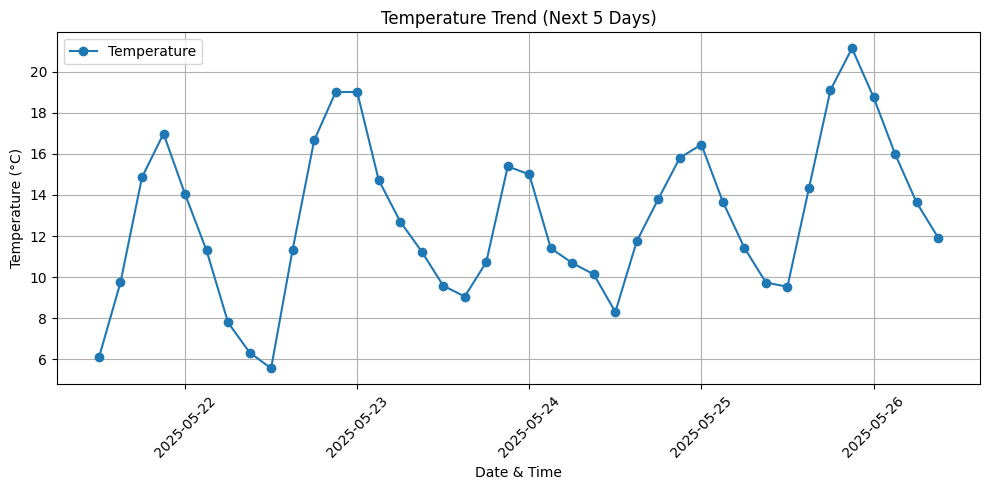

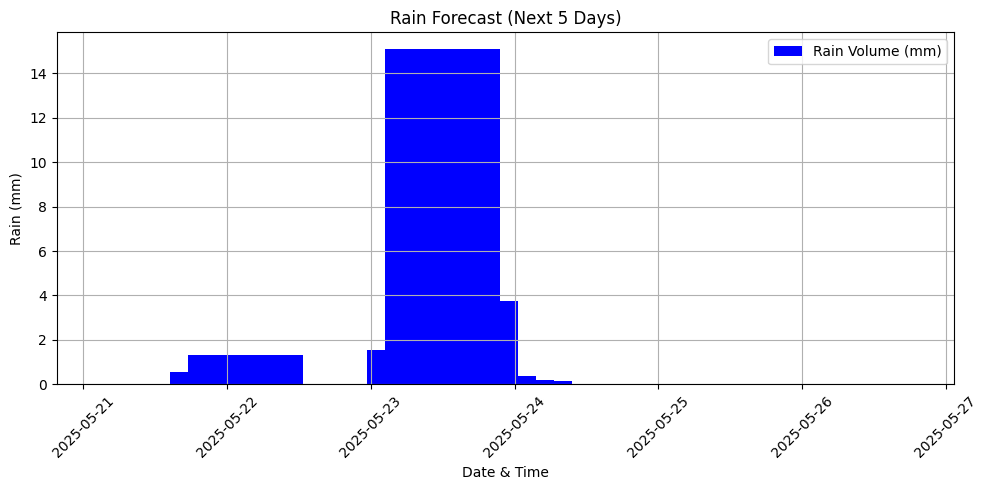

In [7]:
import requests
import pyinputplus as pyip
import matplotlib.pyplot as plt
import logging
from datetime import datetime
import sys
import os

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load API key - Directly use the API key string
# Removed the file path check and file reading
API_KEY = '148e8cfafb2e24494693f49edb7e2296'

# Check if the API key is empty
if not API_KEY:
    print("API key is empty. Please provide a valid API key.")
    sys.exit(1)

BASE_URL_CURRENT = "https://api.openweathermap.org/data/2.5/weather"
BASE_URL_FORECAST = "https://api.openweathermap.org/data/2.5/forecast"

def get_weather(city, units="metric"):
    params = {"q": city, "appid": API_KEY, "units": units}
    try:
        response = requests.get(BASE_URL_CURRENT, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()
        if data.get("cod") != 200: # Note: API returns 200 for success, not a string "200"
            print(f"Error: {data.get('message', 'Unknown error')}")
            return None
        return data
    except requests.exceptions.RequestException as e:
        logging.error(f"Weather request failed: {e}")
        return None

def get_forecast(city, units="metric"):
    params = {"q": city, "appid": API_KEY, "units": units}
    try:
        response = requests.get(BASE_URL_FORECAST, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()
        if data.get("cod") != "200":
            print(f"Error: {data.get('message', 'Unknown error')}")
            return None
        return data
    except requests.exceptions.RequestException as e:
        logging.error(f"Forecast request failed: {e}")
        return None

def display_current_weather(data, units="metric"):
    if not data:
        print("No data to display.")
        return
    name = data.get('name')
    country = data['sys'].get('country', 'N/A')
    temp = data['main'].get('temp', 'N/A')
    condition = data['weather'][0].get('description', 'N/A').title()
    temp_unit = '°C' if units == 'metric' else '°F' if units == 'imperial' else 'K'
    print(f"\n📍 {name}, {country}")
    print(f"🌡️  Temperature: {temp}{temp_unit}")
    print(f"🌤️  Conditions: {condition}")
    print(f"💧 Humidity: {data['main'].get('humidity')}%")
    print(f"💨 Wind: {data['wind'].get('speed')} m/s")

def plot_temperature_trend(forecast_data, units="metric"):
    dates = []
    temps = []
    # Add check for 'list' key
    if 'list' not in forecast_data or not forecast_data['list']:
        print("No forecast entries found for plotting temperature.")
        return
    for entry in forecast_data['list']:
        dates.append(datetime.fromtimestamp(entry['dt']))
        temps.append(entry['main']['temp'])

    plt.figure(figsize=(10, 5))
    plt.plot(dates, temps, label='Temperature', marker='o')
    plt.title("Temperature Trend (Next 5 Days)")
    plt.xlabel("Date & Time")
    plt.ylabel(f"Temperature ({'°C' if units == 'metric' else '°F'})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_precipitation_chance(forecast_data):
    dates = []
    rain = []
    # Add check for 'list' key
    if 'list' not in forecast_data or not forecast_data['list']:
        print("No forecast entries found for plotting precipitation.")
        return
    for entry in forecast_data['list']:
        dates.append(datetime.fromtimestamp(entry['dt']))
        rain.append(entry.get('rain', {}).get('3h', 0))

    plt.figure(figsize=(10, 5))
    plt.bar(dates, rain, label='Rain Volume (mm)', color='blue')
    plt.title("Rain Forecast (Next 5 Days)")
    plt.xlabel("Date & Time")
    plt.ylabel("Rain (mm)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

def parse_natural_language_query(query, city, units="metric"):
    query = query.lower()
    if "temperature" in query or "hot" in query:
        weather = get_weather(city, units)
        if weather:
            print(f"It is currently {weather['main']['temp']}° with {weather['weather'][0]['description']}.")
    elif "rain" in query or "precipitation" in query:
        forecast = get_forecast(city, units)
        if forecast:
            print("🌧️ Rain forecast (next 24h):")
            # Add check for 'list' key before slicing
            if 'list' in forecast:
                for entry in forecast['list'][:8]:
                    rain = entry.get('rain', {}).get('3h', 0)
                    time = datetime.fromtimestamp(entry['dt']).strftime("%a %H:%M")
                    print(f"⏰ {time}: 🌧️ {rain} mm")
            else:
                print("No forecast data available.")
    else:
        print("I didn't understand your question. Try asking about temperature or rain.")

def choose_units():
    unit_choice = pyip.inputMenu(["Metric (°C, m/s)", "Imperial (°F, mph)", "Standard (K, m/s)"],
                                 prompt="Choose temperature units:\n", numbered=True)
    return {"Metric (°C, m/s)": "metric", "Imperial (°F, mph)": "imperial", "Standard (K, m/s)": "standard"}[unit_choice]

def main_menu():
    print("\n" + "="*40)
    print("🌦️  WELCOME TO MY WEATHER ASSISTANT 🌦️")
    print("="*40)
    city = pyip.inputStr(prompt="📍 Enter city name: ")
    units = choose_units()

    while True:
        print("\n📋 MAIN MENU")
        print("-" * 20)
        choice = pyip.inputMenu(
            ["📊 Current Weather", "📈 5-Day Forecast Chart", "💬 Ask a Question",
             "🏙️ Change City", "⚙️ Change Units", "❌ Exit"],
            numbered=True
        )

        if choice.startswith("📊"):
            data = get_weather(city, units)
            display_current_weather(data, units)
        elif choice.startswith("📈"):
            forecast_data = get_forecast(city, units)
            if forecast_data:
                plot_temperature_trend(forecast_data, units)
                plot_precipitation_chance(forecast_data)
        elif choice.startswith("💬"):
            query = pyip.inputStr(prompt="🧠 Ask your weather question: ")
            parse_natural_language_query(query, city, units)
        elif choice.startswith("🏙️"):
            city = pyip.inputStr(prompt="🌍 Enter new city: ")
        elif choice.startswith("⚙️"):
            units = choose_units()
        elif choice.startswith("❌"):
            print("\n👋 Thanks for using the Weather Assistant. Stay safe!")

        break

if __name__ == "__main__":
    main_menu()

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.